In [50]:
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt

df = pd.read_csv('Reviews.csv').sample(frac=1)
y = df['Score'] -1
df.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator','Time'],inplace=True)
df

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt

df = pd.read_csv('Reviews.csv').sample(frac=1)
y = df['Score'] -1
df.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator','Time'],inplace=True)
df

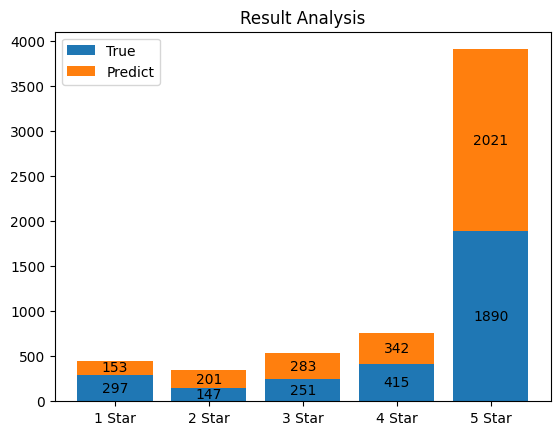

In [69]:
memo = {'True':np.array([len(y_test[y_test==i]) for i in np.unique(y_test)]),'Predict':np.array([len(y_calc[np.argmax(y_calc,axis=1)==i]) for i in np.unique(y_train)])}
bottom = np.zeros(5)
fig, ax = plt.subplots()

for label, data in memo.items():
    p = ax.bar([f"{i+1} Star" for i in range(5)], data,label=label,bottom=bottom)
    bottom += data

    ax.bar_label(p, label_type='center')

ax.set_title('Result Analysis')
ax.legend()

plt.show()

In [65]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2290 - accuracy: 0.8976
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1641 - accuracy: 0.9461
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1285 - accuracy: 0.9630
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1725 - accuracy: 0.9403
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2255 - accuracy: 0.9212
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1881 - accuracy: 0.9401
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1880 - accuracy: 0.9435
Epoch 8/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1932 - accuracy: 0.9208
Epoch 9/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1926 - accuracy: 0.9207
Epoch 10/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1931 - accuracy: 

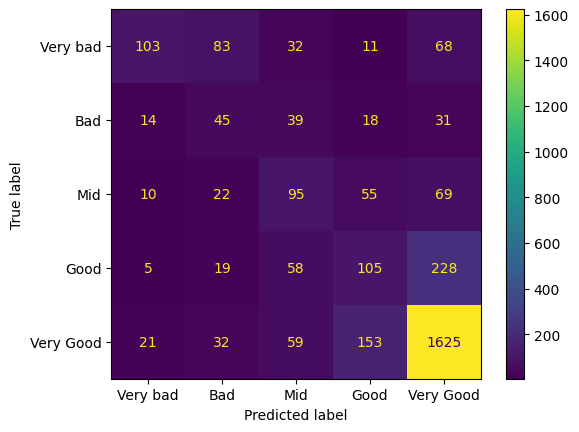

In [68]:
conf = sklearn.metrics.confusion_matrix(y_true=y_test,y_pred=np.argmax(y_calc,axis=1))
conf_matrix = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=['Very bad','Bad','Mid','Good','Very Good'])
conf_matrix.plot()

In [52]:
df.drop(columns=['Score'],inplace=True)

split = 0.8
limit = round(df.shape[0]*split)

x_train,y_train = df.iloc[:limit,1].to_numpy(),y.iloc[:limit].to_numpy()
x_test,y_test = df.iloc[limit:,1].to_numpy(),y.iloc[limit:].to_numpy()
x_train


array(["In an effort to save money, I bought this coffee on sale for $3.99 at the grocery store when I was unemployed. I grabbed the container as I drooled over the bags of Starbucks and gourmet varieties also present on the self. Once home I brewed a pot and to my surprise the aroma was incredible. Finally, I partook of a cup, and was surprised by how delicious it was! It is dark but not bitter. When I was a regular Starbuck's customer, I'd sometimes get a bad cup, with a bitter after taste. Not the case with this stuff. It's smooth. Keep in mind that you do have to add a little more coffee per each cup of water. For example if you usually put one heaping scoop per cup, put one and half per cup, or to suit your taste. Experiment with the measurements, but the coffee itself is quite good.",
       'I had bought Pocky when on vacation and enjoyed it but living where there are no Asian stores I have to shop on the internet. The guys in the family seem to like it better than the ladies fo

In [53]:
max_vocab_length = 10000 
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_vocab_length,output_mode="int")
embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,output_dim=128, embeddings_initializer="uniform") 
text_vectorizer.adapt(x_train)

In [54]:
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x) 
x = tf.keras.layers.Dense(16, activation="relu")(x) 
outputs = tf.keras.layers.Dense(5, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])

In [66]:
y_calc = model.predict(x_test)
model.evaluate(x_test,y_test)
y_calc

94/94 [==============================] - 1s 9ms/step - loss: 4.6672 - accuracy: 0.6577


array([[1.5171461e-32, 3.1890261e-19, 7.9518716e-13, 5.9282748e-12,
        1.0000000e+00],
       [4.0131674e-28, 3.4587828e-16, 1.0445433e-10, 8.3453516e-10,
        1.0000000e+00],
       [6.7020380e-07, 2.1121651e-02, 7.7559493e-02, 8.9805675e-01,
        3.2615226e-03],
       ...,
       [1.2003885e-14, 6.1283146e-07, 2.9745576e-04, 2.9345681e-03,
        9.9676740e-01],
       [3.5744641e-05, 4.5527071e-02, 8.6339974e-01, 8.0903783e-02,
        1.0133580e-02],
       [3.5744641e-05, 4.5527071e-02, 8.6339974e-01, 8.0903783e-02,
        1.0133580e-02]], dtype=float32)